In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [24]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [25]:
df_subset = df[['address', 'area', 'price']]
df_subset = df_subset.drop(df_subset[df_subset.price < 30000].index)
df_subset.head()

,address,area,price
0,Knollendamstraat 4 III/IV,108,510000
1,Moerdijkstraat 47 1,47,215000
2,Zeeburgerdijk 349,116,325000
3,Brederodestraat 124 -1,58,315000
4,Admiraal De Ruijterweg 409 III,63,200000


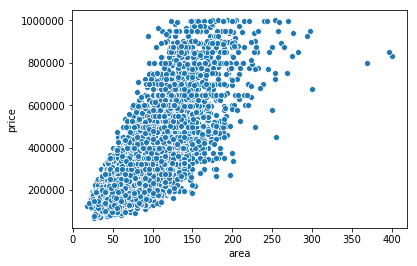

In [26]:
sns.scatterplot(data=df_subset, x="area", y="price")

In [27]:
#sns.lmplot(x='area', y='price', fit_reg=False, data=df_subset)
#plt.xlabel('Price (in euros)')
#plt.ylabel('Area surface (in m2)')
#plt.title('Price per m2')
#plt.show()

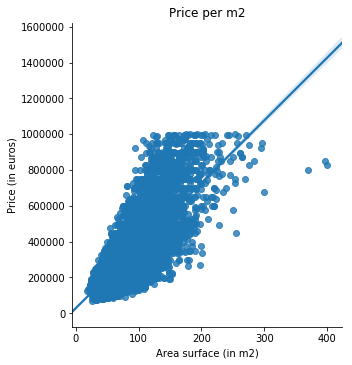

In [28]:
sns.lmplot(x='area', y='price', data=df_subset)
plt.xlabel('Area surface (in m2)')
plt.ylabel('Price (in euros)')
plt.title('Price per m2')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
x = df_subset[['area']] 
y = df_subset['price']
lm = LinearRegression()
lm.fit(x, y)

b0 = lm.coef_[0]
b1 = lm.intercept_

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")

The regression line is equal to y = 3498.81 + 27983.93X


In [43]:
prediction_p = lm.predict(70)

array([272900.93507299])

The predicted price for a house with a area of 70 m2 is 272901

In [47]:
df_subset['price_p'] = lm.predict(x)
df_subset.head(10)

,address,area,price,price_p
0,Knollendamstraat 4 III/IV,108,510000,405855.880756
1,Moerdijkstraat 47 1,47,215000,192428.204791
2,Zeeburgerdijk 349,116,325000,433846.395637
3,Brederodestraat 124 -1,58,315000,230915.162752
4,Admiraal De Ruijterweg 409 III,63,200000,248409.234552
5,Bertrand Russellstraat 46,125,515000,465335.724877
6,Admiraal De Ruijterweg 417 I,64,200000,251908.048913
7,Deltastraat 10 -boven,155,599000,570300.155680
8,Ben van Meerendonkstraat 49,85,249000,325383.150474
9,Jacob van Lennepstraat 263 B,67,300000,262404.491993
